# Shot Data Analysis and Visualization Notebook

This notebook is designed to analyze and visualize shot data from football matches. It focuses on processing the data, identifying patterns, and presenting insights through various visualizations. The analysis primarily covers teams like Liverpool and Newcastle, showcasing their shot statistics.

In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import os

In [2]:
# Loading the shot data from a CSV file into a DataFrame
df= pd.read_csv(r"C:\Users\santo\Downloads\shot_data.csv")

In [3]:
# Checking for any missing values in the dataset
df.isnull().sum()

id                           0
event_id                     0
minute                       0
second                       0
team_id                      0
player_id                    0
x                            0
y                            0
end_x                        0
end_y                        0
qualifiers                   0
is_touch                     0
blocked_x                    0
blocked_y                    0
goal_mouth_z                 0
goal_mouth_y                 0
is_shot                      0
card_type                    0
is_goal                      0
type_display_name            0
outcome_type_display_name    0
period_display_name          0
distance                     0
angle                        0
xG                           0
dtype: int64

In [4]:
# Replacing team IDs with team names for clarity
df['team_id'] = df['team_id'].replace({26: 'Liverpool', 23: 'Newcastle'})
df = df.rename(columns={'team_id': 'team'})

In [5]:
# Displaying the first few rows of the dataset to understand its structure
df.head()

,id,event_id,minute,second,team,player_id,x,y,end_x,end_y,...,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,distance,angle,xG
0,2633727783,10,0,20,Liverpool,369875,86.9,45.5,0.0,0.0,...,49.2,True,False,False,Shot,Successful,FirstHalf,98.091080,-2.659251,0.042867
1,2633727903,29,1,23,Liverpool,318871,81.3,46.4,0.0,0.0,...,49.5,True,False,False,Shot,Successful,FirstHalf,93.609027,-2.622977,0.013018
2,2633728303,56,7,32,Newcastle,474264,89.3,34.2,0.0,0.0,...,49.5,True,False,False,Shot,Successful,FirstHalf,95.624944,-2.775845,0.022540
3,2633728625,122,11,26,Liverpool,400828,93.1,45.4,0.0,0.0,...,50.7,True,False,False,Shot,Successful,FirstHalf,103.579776,-2.687876,0.166609
4,2633728627,123,11,28,Liverpool,355354,88.0,58.3,0.0,0.0,...,50.1,True,False,False,Shot,Successful,FirstHalf,105.559888,-2.556480,0.253640


In [6]:
liverpool_xG_sum = df[df['team'] == 'Liverpool']['xG'].sum()
newcastle_xG_sum = df[df['team'] == 'Newcastle']['xG'].sum()
print("Total xG for Liverpool in the match vs Newcastle was:", liverpool_xG_sum)
print("Total xG for Newcastle in the match vs Liverpool was:", newcastle_xG_sum)

Total xG for Liverpool in the match vs Newcastle was: 5.393934285257372
Total xG for Newcastle in the match vs Liverpool was: 0.8216323350814905


In [7]:
# Importing necessary libraries for data analysis and visualization
import seaborn as sns
import matplotlib.pyplot as plt

def generateTeamxGDataFrame(team):
    xg = df[['team', 'minute', 'type_display_name', 'xG', 'x', 'y','is_goal']]
    team_xg = xg[xg['team'] == team].reset_index()
    return team_xg

def generatexGPlot(team):
    team_xg = generateTeamxGDataFrame(team)
    # xg_events[xg_events.shot_statsbomb_xg.isna()==False]
    plt.clf()
    sns.lineplot(data=team_xg, x='minute', y='xG',errorbar=None)
    plt.xlabel("Minutes")
    plt.ylabel("xG")
    plt.title("xG/Minute for " + team)
    plt.show()

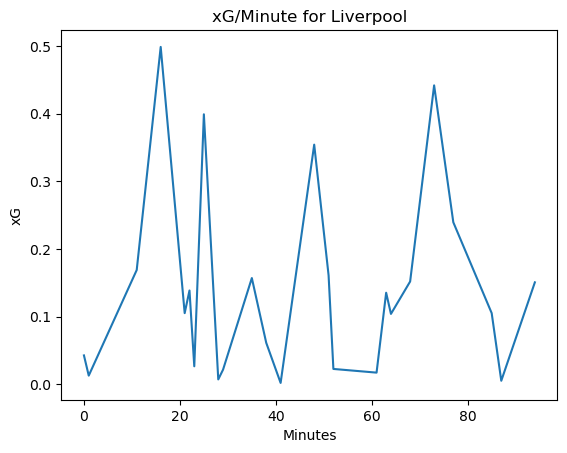

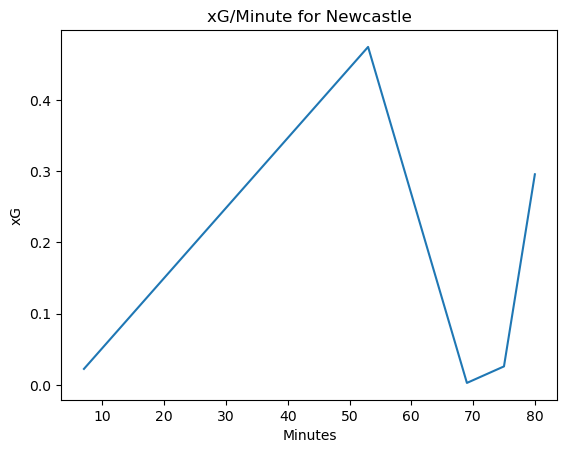

In [8]:
generatexGPlot('Liverpool')
generatexGPlot('Newcastle')

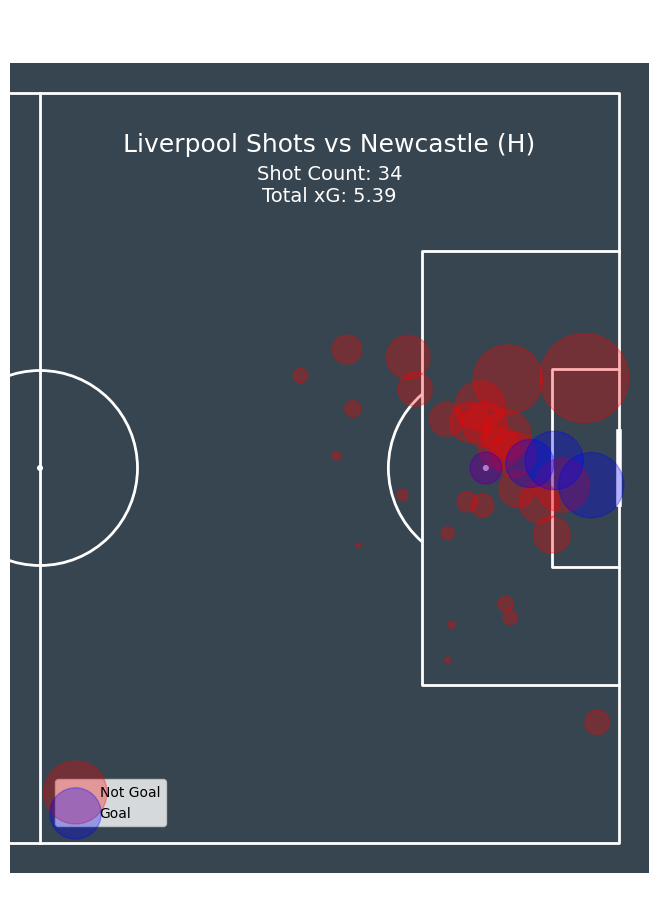

In [9]:
# Importing necessary libraries for data analysis and visualization
from mplsoccer import Pitch
import matplotlib.pyplot as plt

def generateTeamShotMap(team):
    team_xg = generateTeamxGDataFrame(team)
    team_shots = team_xg[team_xg.type_display_name == 'Shot']

    pitch = Pitch(pitch_type='opta', line_color='white', pitch_color='#36454F', half=True)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

    # Filter shots with is_goal as TRUE
    goals = team_shots[team_shots['is_goal'] == True]
    # Plot shots with is_goal as FALSE in red
    pitch.scatter(team_shots[team_shots['is_goal'] == False].x, team_shots[team_shots['is_goal'] == False].y,
                  alpha=0.3, s=team_shots[team_shots['is_goal'] == False].xG * 5000, color="red", ax=ax['pitch'], label='Not Goal')
    # Plot shots with is_goal as TRUE in blue
    pitch.scatter(goals.x, goals.y, alpha=0.3, s=goals.xG * 5000, color="blue", ax=ax['pitch'], label='Goal')

    # Display the title with 'Liverpool shots' in the upper center
    ax['pitch'].text(0.5, 0.9, f'{team} Shots vs Newcastle (H)', color='white', size=18, ha='center', va='center', transform=ax['pitch'].transAxes)

    # Display a table-like text annotation for the shot count and accumulated xG
    table_text = f'Shot Count: {len(team_shots)}\nTotal xG: {team_shots["xG"].sum():.2f}'
    ax['pitch'].text(0.5, 0.85, table_text, color='white', size=14, ha='center', va='center', transform=ax['pitch'].transAxes)

    # Adjust legend coordinates using loc and bbox_to_anchor
    ax['pitch'].legend(loc='lower left', bbox_to_anchor=(0.06, 0.05))

    plt.show()

# Assuming you have an 'is_goal' column in your DataFrame
generateTeamShotMap('Liverpool')

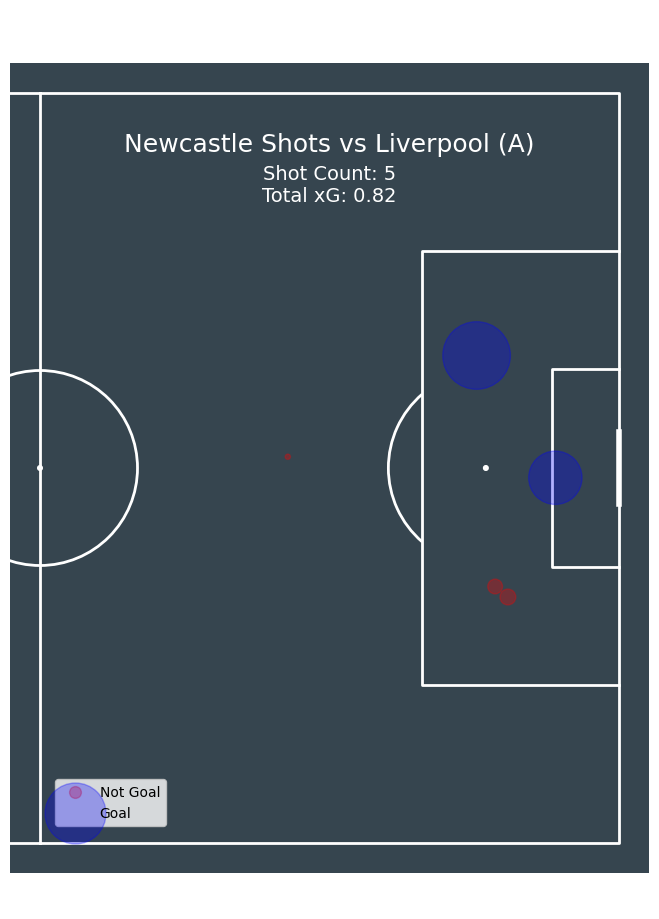

In [10]:
# Importing necessary libraries for data analysis and visualization
from mplsoccer import Pitch
import matplotlib.pyplot as plt

def generateTeamShotMap(team):
    team_xg = generateTeamxGDataFrame(team)
    team_shots = team_xg[team_xg.type_display_name == 'Shot']

    pitch = Pitch(pitch_type='opta', line_color='white', pitch_color='#36454F', half=True)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

    # Filter shots with is_goal as TRUE
    goals = team_shots[team_shots['is_goal'] == True]
    # Plot shots with is_goal as FALSE in red
    pitch.scatter(team_shots[team_shots['is_goal'] == False].x, team_shots[team_shots['is_goal'] == False].y,
                  alpha=0.3, s=team_shots[team_shots['is_goal'] == False].xG * 5000, color="red", ax=ax['pitch'], label='Not Goal')
    # Plot shots with is_goal as TRUE in blue
    pitch.scatter(goals.x, goals.y, alpha=0.3, s=goals.xG * 5000, color="blue", ax=ax['pitch'], label='Goal')

    # Display the title with 'Liverpool shots' in the upper center
    ax['pitch'].text(0.5, 0.9, f'{team} Shots vs Liverpool (A)', color='white', size=18, ha='center', va='center', transform=ax['pitch'].transAxes)

    # Display a table-like text annotation for the shot count and accumulated xG
    table_text = f'Shot Count: {len(team_shots)}\nTotal xG: {team_shots["xG"].sum():.2f}'
    ax['pitch'].text(0.5, 0.85, table_text, color='white', size=14, ha='center', va='center', transform=ax['pitch'].transAxes)

    # Adjust legend coordinates using loc and bbox_to_anchor
    ax['pitch'].legend(loc='lower left', bbox_to_anchor=(0.06, 0.05))

    plt.show()

# Assuming you have an 'is_goal' column in your DataFrame
generateTeamShotMap('Newcastle')